In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [4]:
k=pd.read_csv(r"C:\Users\kalyana raghava\Desktop\machine learning\task 2\wine_data.csv")
print(k)

     fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0         8.119941          0.451753     0.261706       13.454060   0.290278   
1        14.457857          1.129612     0.246979       15.933628   0.404662   
2        12.051933          1.758597     0.906255        5.009358   0.382479   
3        10.585243          1.491227     0.249546       12.497482   0.085411   
4         5.716205          1.632466     0.271950       11.434920   0.083132   
..             ...               ...          ...             ...        ...   
995       5.007403          1.348215     0.865296        8.842141   0.449725   
996      14.090449          1.917568     0.157273        6.688024   0.068497   
997       5.505005          0.231020     0.309788        7.891446   0.170643   
998      14.452611          0.208404     0.290046       10.598812   0.409715   
999       8.906064          0.636155     0.871414        3.227347   0.302683   

     free_sulfur_dioxide  total_sulfur_

In [5]:
k.shape

(1000, 12)

In [6]:
k.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,8.119941,0.451753,0.261706,13.454060,0.290278,39.969917,133.168821,0.982716,3.580402,1.844440,10.615486,3
1,14.457857,1.129612,0.246979,15.933628,0.404662,47.870130,42.753409,0.993074,3.530925,1.145649,10.330385,9
2,12.051933,1.758597,0.906255,5.009358,0.382479,85.600192,175.754967,1.038187,2.643631,1.504838,9.233077,1
3,10.585243,1.491227,0.249546,12.497482,0.085411,34.660434,126.492085,1.033674,3.883859,0.984887,12.250867,3
4,5.716205,1.632466,0.271950,11.434920,0.083132,87.095319,39.868738,1.004545,3.352708,1.334062,11.336369,7


In [7]:
k.isnull()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
k.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

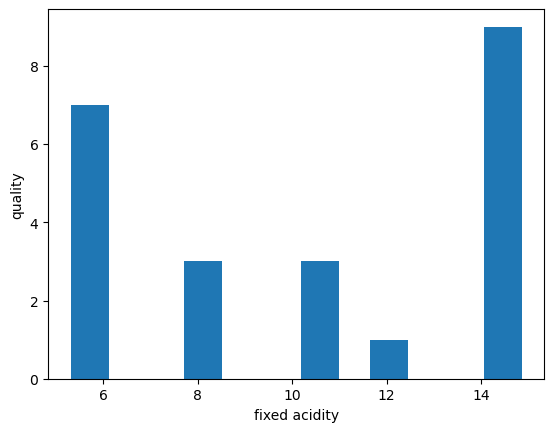

In [11]:
x1=k["fixed_acidity"].head()
x2=k["quality"].head()
plt.bar(x1,x2)
plt.xlabel("fixed acidity")
plt.ylabel("quality")
plt.show()

(array([1., 0., 1., 0., 0., 1., 0., 1., 0., 1.]),
 array([ 5.71620504,  6.59037028,  7.46453551,  8.33870074,  9.21286598,
        10.08703121, 10.96119644, 11.83536167, 12.70952691, 13.58369214,
        14.45785737]),
 <BarContainer object of 10 artists>)

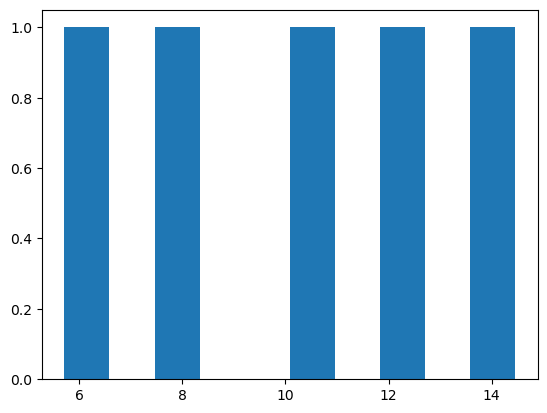

In [12]:
plt.hist(x1)

In [10]:
#replace nan with sum
k.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [36]:
#divide the data set into two parts 
#selected attributes  are stored in x
#target attributes are stored in y
#based upon the above example except quality reamining all stored in x
#quality feauture is stored in y

In [37]:
x=k.drop("quality",axis=1)
print(x)

     fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0         8.119941          0.451753     0.261706       13.454060   0.290278   
1        14.457857          1.129612     0.246979       15.933628   0.404662   
2        12.051933          1.758597     0.906255        5.009358   0.382479   
3        10.585243          1.491227     0.249546       12.497482   0.085411   
4         5.716205          1.632466     0.271950       11.434920   0.083132   
..             ...               ...          ...             ...        ...   
995       5.007403          1.348215     0.865296        8.842141   0.449725   
996      14.090449          1.917568     0.157273        6.688024   0.068497   
997       5.505005          0.231020     0.309788        7.891446   0.170643   
998      14.452611          0.208404     0.290046       10.598812   0.409715   
999       8.906064          0.636155     0.871414        3.227347   0.302683   

     free_sulfur_dioxide  total_sulfur_

In [38]:
x.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,8.119941,0.451753,0.261706,13.454060,0.290278,39.969917,133.168821,0.982716,3.580402,1.844440,10.615486
1,14.457857,1.129612,0.246979,15.933628,0.404662,47.870130,42.753409,0.993074,3.530925,1.145649,10.330385
2,12.051933,1.758597,0.906255,5.009358,0.382479,85.600192,175.754967,1.038187,2.643631,1.504838,9.233077
3,10.585243,1.491227,0.249546,12.497482,0.085411,34.660434,126.492085,1.033674,3.883859,0.984887,12.250867
4,5.716205,1.632466,0.271950,11.434920,0.083132,87.095319,39.868738,1.004545,3.352708,1.334062,11.336369


In [39]:
y=k["quality"]
print(y)

0      3
1      9
2      1
3      3
4      7
      ..
995    3
996    4
997    4
998    7
999    8
Name: quality, Length: 1000, dtype: int64


In [40]:
#now split x into two parts x_train,x_test
#smiliarly y also y_train,y_test
#20% of test size and 80% of train data
#random state is used to distribute the data in equally to all attributes

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
print("x data",x)
print("x_train data",x_train)
print("x_test data",x_test)

x data      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0         8.119941          0.451753     0.261706       13.454060   0.290278   
1        14.457857          1.129612     0.246979       15.933628   0.404662   
2        12.051933          1.758597     0.906255        5.009358   0.382479   
3        10.585243          1.491227     0.249546       12.497482   0.085411   
4         5.716205          1.632466     0.271950       11.434920   0.083132   
..             ...               ...          ...             ...        ...   
995       5.007403          1.348215     0.865296        8.842141   0.449725   
996      14.090449          1.917568     0.157273        6.688024   0.068497   
997       5.505005          0.231020     0.309788        7.891446   0.170643   
998      14.452611          0.208404     0.290046       10.598812   0.409715   
999       8.906064          0.636155     0.871414        3.227347   0.302683   

     free_sulfur_dioxide  total_

In [43]:
print("shape of x ",x.shape)
print("shape of x_train",x_train.shape)
print("shape of x_test",x_test.shape)

shape of x  (1000, 11)
shape of x_train (800, 11)
shape of x_test (200, 11)


In [44]:
print("y data",y)
print("y_train data",y_train)
print("y_test data",y_test)

y data 0      3
1      9
2      1
3      3
4      7
      ..
995    3
996    4
997    4
998    7
999    8
Name: quality, Length: 1000, dtype: int64
y_train data 29     9
535    4
695    4
557    7
836    5
      ..
106    3
270    9
860    3
435    9
102    8
Name: quality, Length: 800, dtype: int64
y_test data 521    9
737    9
740    2
660    2
411    2
      ..
408    1
332    2
208    8
613    4
78     1
Name: quality, Length: 200, dtype: int64


In [45]:
print('shape of y',y.shape)
print("shape of y_train",y_train.shape)
print("shape of y_test ",y_test.shape)

shape of y (1000,)
shape of y_train (800,)
shape of y_test  (200,)


In [46]:
#now create a model and predict it
model=LogisticRegression(max_iter=10000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [47]:
y_pred=model.predict(x_test)

In [48]:
mse=accuracy_score(y_test,y_pred)
print("the accuracy score is",mse)

the accuracy score is 0.15
